
# <b> Bike sharing Analysis

*The data is originally provided by, [Analyze Bike Sharing](http://capitalbikeshare.com/system-data).*

##  Bisnis Probelm Understanding 

*<b>Bike Sharing<b>* adalah generasi baru persewaan sepeda dimana seluruh proses persewaan, dan pengembalian serba otomatis. Dalam sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. *Bike Sharing* dianggap sebagai alternatif yang lebih murah, sehat, dan ramah lingkungan dibandingkan dengan kendaraan pribadi atau transportasi umum. Selain itu, *Bike Sharing* dirancang untuk perjalanan cepat dengan mempertimbangkan kenyamanan, sehingga menjadi cara yang menyenangkan dan terjangkau untuk berkeliling, serta dapat mengurangi polusi udara, menghindari macet dan biaya parkir.

Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia, yang terdiri dari lebih dari 500 ribu sepeda. Oleh karena itu, penting bagi *<b>Capital Bike Share<b>* untuk mendapatkan profit dari layanannya guna memastikan kelangsungan dan pengembangan program *Bike Sharing* di masa depan. *Bike Sharing* menjadi pilihan yang menarik bagi banyak orang dalam meningkatkan permintaan akan transportasi ramah lingkungan, sehingga *Capital Bike Share* dapat terus memperluas layanannya dan menyediakan lebih banyak sepeda untuk memenuhi permintaan pasar.
    


## Probelm Statement 

Salah satu tantangan terbesar bagi perusahaan seperti *<b> Bike Sharing<b>* adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan bagi perusahaan, serta dapat memberikan pengalaman positif terhadap penyewa *Bike Sharing*.
    
Mengingat perkembangan *Capital Bike Share* menjadi salah satu program berbagi sepeda terbesar di *Amerika Serikat* yang memiliki lebih dari *4.300* sepeda dan *500* stasiun di *Washington D.C., Arlington, Alexandria, Fairfax County, dan Montgomery County*. Dengan popularitasnya yang terus meningkat *<b>Perusahaan Bike Sharing perlu mempertimbangkan faktor - faktor apa saja yang mendorong permintaan persewaan sepeda? serta membangun model prediksi persewaan sepeda?<b>*.

## Goals

Berdasarkan permasalahan tersebut, *<b>Capital Bike Share<b>* tentu perlu memiliki `tools` yang dapat `memprediksi jumlah persewaan sepeda di masa depan berdasarkan faktor-faktor tertentu.` Hal ini dapat membantu perusahaan untuk mengoptimalkan stok sepeda dan memperkirakan permintaan untuk mengantisipasi kekurangan atau kelebihan persediaan. Selain itu, prediksi ini juga dapat digunakan untuk membuat keputusan bisnis yang lebih baik dan meningkatkan jumlah pelanggan. Dengan kata lain, semakin banyak pelanggan menyewa berarti dapat **meningkatkan revenue perusahaan**, dalam konteks ini didapat dari 

## Analytic Approach

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang menjadi faktor mendorong permintaan persewaan sepeda?

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi jumlah persewaan, yang mana akan berguna untuk profit perusahaan.

## Metric Evaluation



Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## Data Understanding

- Dataset merupakan data penyewa sepeda *Capital Bike Share* di di *Washington D.C.* pada tahun 2011 hingga 2012.
- Setiap baris data merepresentasikan informasi jumlah sepeda disewa .

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | float64 | Normalized wind speed. The values are devided to 67(max) |
| weathersit | Integer | 1:Clear, Few Clouds, Party Cloudy, PartlyCloudy|
|  | | 2: Most+ Cloudy , Mist + Broken Clouds, Mist + Few Clouds, Mist |
|  | | 3: Light Snow, Light Rain + Thunderstrom + Scattered Clouds, Light Rain + Scattered Clouds |
|  | | 4: Heavy Rain + Ice Pallets + Thunderstrom + Mist , Snow + Fog |
| holiday | Integer | Weather day is holiday or not (extracted from [weblink]) |
| season | Integer | season 1:winter, 2:Spring, 3:Summer, 4:Fall |
| atemp | float64 | Normalized feeling temperatures in Celcius |
| temp | float64 |  Normalized temperatures in Celcius |
| hr | Integer | Hour(0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt  | Integer | Count of total rental bikers including both casual and registered |

<br>

In [1]:
# import relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head(2)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18


In [3]:
# Check total the Data 
df.shape 

(12165, 11)

In [4]:
# get the information about the dataframe
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,dteday,object,0,0.0,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31]"
1,hum,float64,0,0.0,89,"[0.62, 0.64, 0.53, 0.87]"
2,weathersit,int64,0,0.0,4,"[1, 2, 3, 4]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 2, 3, 1]"
5,atemp,float64,0,0.0,65,"[0.3485, 0.5152, 0.6212, 0.697]"
6,temp,float64,0,0.0,50,"[0.36, 0.54, 0.62, 0.76]"
7,hr,int64,0,0.0,24,"[16, 4, 23, 8]"
8,casual,int64,0,0.0,305,"[24, 2, 17, 19]"
9,registered,int64,0,0.0,742,"[226, 16, 90, 126]"


<b> Observation<br>
* There are no missing value for each feature <br> 
* Need to convert dteday from object to datetime <br>
* Need to change values into more understable values
    


# <b> **Exploratory Data Analysis**

In [5]:
# Let's explore the bike sharing dataset
# Rename columns to something easier to type (the all-caps are annoying!)
rename = { 'dteday' : 'date',
          'hum' : 'humidity',
         'weathersit' : 'weather',
         'hr' : 'hour',
         'cnt':'count',}
df.rename(index=str, columns=rename, inplace=True)

# convert the data type from object to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# create year, month and day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofweek

In [6]:
# Data Fields 
# setiap baris mewakili jumlah penyewa sepeda berdasarkan jam 
# Datetime ==> waktu peminjaman sepeda bisa dikatakan sama karena ditentukan oleh jam 
# year, month, day and hour ==> mejelaskan waktu penyewaan sepeda

# Season ==> mengacu pada musim dalam satu tahun,
# ==> Spring (musim semi) : Maret - Mei , Summer (musim panas) : Juni - Agustus, Fall (musim gugur) : September - November, Winter (musim dingin) : Desember - Februari
# ==> 1 winter 
# ==> 2 Spring 
# ==> 3.Summer 
# ==> 4. Fall

# holiday ==> menunjukkan apakah hari itu merupakan hari libur atau tidak. 
# Jika nilainya 1, ==> hari libur, 
# dan jika nilainya 0, ==> bukan hari libur. 
# ==> Informasi ini dapat membantu dalam menganalisis tren penggunaan sepeda pada hari libur dan hari kerja.

# Weather ==> mengindikasikan kondisi cuaca saat data pengamatan diambil
# ==> 1: Cerah, beberapa awan, sebagian berawan, sebagian berawan
# == 2: Berkabut + berawan, berkabut + awan terputus-putus, berkabut + beberapa awan, berkabut
# ==> 3: Kode cuaca 3: Salju ringan, hujan ringan + petir + awan terpencar, hujan ringan + awan terpencar
# ==> 4: Kode cuaca 4: Hujan deras + es + petir + berkabut, Salju + Kabut
# ==>  kode cuaca tersebut menggambarkan keadaan cuaca yang terjadi pada saat itu dan mempengaruhi seberapa banyak orang yang menggunakan sepeda pada hari itu

# atemp ==>  singkatan dari "apparent temperature", yaitu suhu yang dirasakan oleh manusia setelah memperhitungkan efek suhu udara, kelembapan, dan kecepatan angin. 
# ==>  menunjukkan suhu yang dirasakan pada waktu tertentu dalam satuan Celcius.
# temp ==> singkatan dari "temperature" yang berarti suhu mengandung informasi tentang suhu dalam satuan Celcius pada saat pengamatan.
# atemp dan temp adalah dua fitur yang berbeda dalam dataset bike sharing.
# temp mengacu pada suhu udara sebenarnya di sekitar stasiun sepeda, diukur dalam derajat Celsius.
# atemp (atau "feels like temperature") mengacu pada sensasi suhu yang dirasakan oleh manusia, yang dipengaruhi oleh suhu udara sebenarnya serta kelembaban dan angin.
# Perbedaan utama antara temp dan atemp adalah bahwa atemp mencoba untuk memperhitungkan bagaimana kelembaban dan angin dapat memengaruhi suhu yang dirasakan oleh manusia, 
# sedangkan temp hanya mencerminkan suhu udara sebenarnya. Karena sepeda digunakan oleh manusia,
# atemp mungkin memberikan informasi yang lebih relevan tentang kondisi yang dirasakan oleh pengendara sepeda.

# Humadity ==> mengindikasikan tingkat kelembaban udara pada saat pengukuran dilakukan,
# ==> Variabel ini dapat mempengaruhi kinerja sepeda saat digunakan dan juga dapat mempengaruhi tingkat kenyamanan pengendara

# casual ==> "Casual" dalam dataset bike sharing mengacu pada jumlah pengguna sepeda yang tidak terdaftar sebagai anggota tetap dari sistem bike sharing.
# ==> Mereka umumnya adalah pengguna satu kali atau pengguna acak yang tidak membayar biaya berlangganan bulanan atau tahunan. 
# ==> Data ini digunakan untuk memahami pola penggunaan sepeda dan permintaan untuk bike sharing pada waktu tertentu.
# registered ==>  jumlah pengguna yang telah terdaftar (member) pada sistem penyewaan sepeda
# Count ==> Total sepeda disewakan 


In [7]:
# Create Data Info After Convert

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,date,datetime64[ns],0,0.0,731,"[2011-12-09T00:00:00.000000000, 2012-06-17T00:..."
1,humidity,float64,0,0.0,89,"[0.62, 0.64, 0.53, 0.87]"
2,weather,int64,0,0.0,4,"[1, 2, 3, 4]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 2, 3, 1]"
5,atemp,float64,0,0.0,65,"[0.3485, 0.5152, 0.6212, 0.697]"
6,temp,float64,0,0.0,50,"[0.36, 0.54, 0.62, 0.76]"
7,hour,int64,0,0.0,24,"[16, 4, 23, 8]"
8,casual,int64,0,0.0,305,"[24, 2, 17, 19]"
9,registered,int64,0,0.0,742,"[226, 16, 90, 126]"


## **Univariate Analysis**

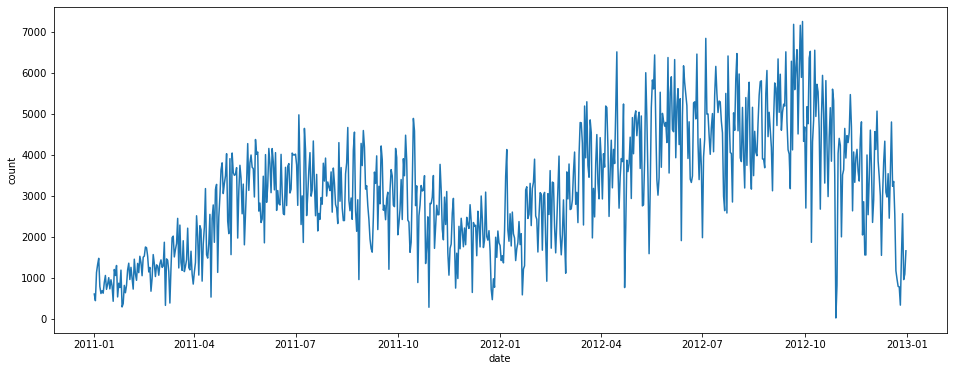

In [8]:
# Count per Day
df_viz = df.copy()
df_viz['date'] = pd.to_datetime(df_viz['date'])  # Konversi kolom 'date' menjadi tipe data datetime
df_viz.set_index('date', inplace=True)  # Atur kolom 'date' sebagai indeks
df_by_day = df_viz.resample("D").sum()  # Resample data menjadi harian
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df_by_day, x=df_by_day.index, y='count')  # Gambar grafik


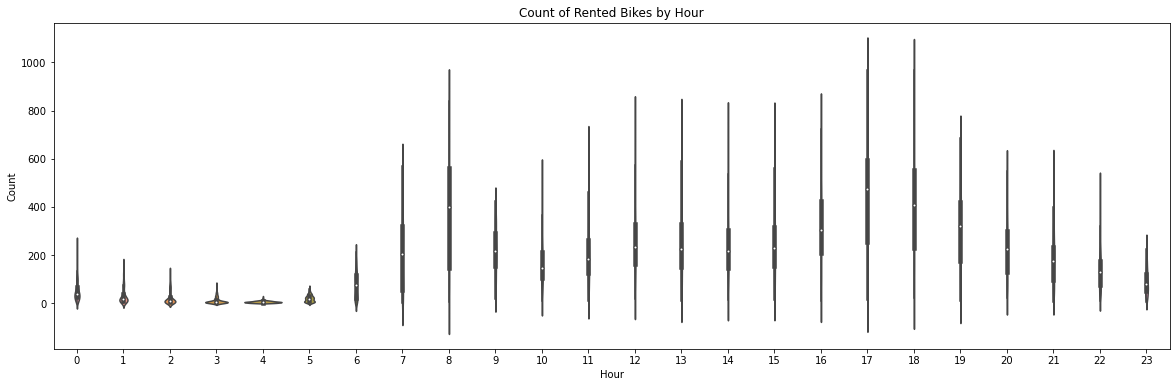

In [9]:
#plots to visualize the relationship "hour" and "count
plt.figure(figsize=(20, 6))
sns.violinplot(data=df, x='hour', y='count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of Rented Bikes by Hour')
plt.show()

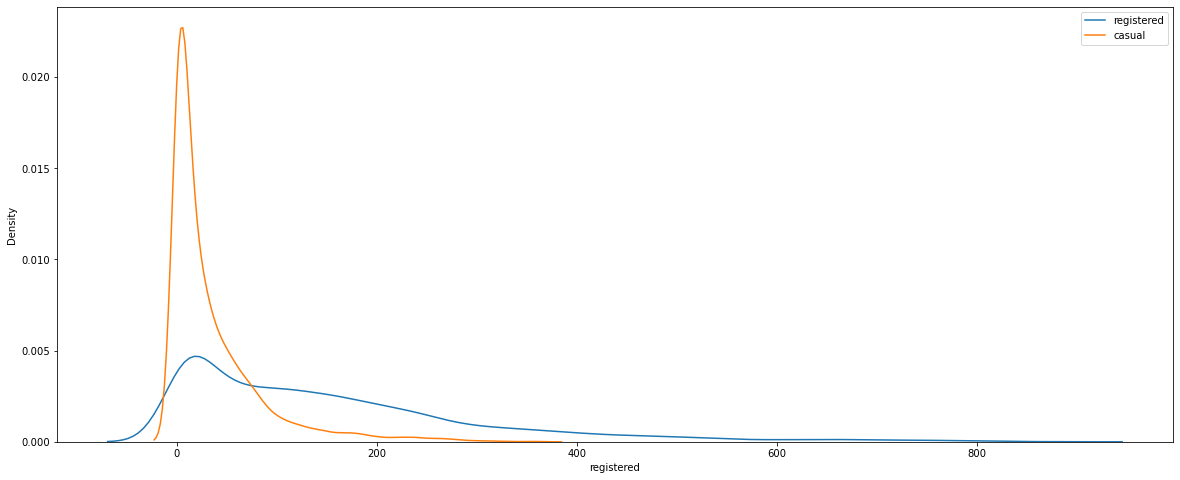

In [10]:
# Plotting Registered and Casual 
fig,ax=plt.subplots(figsize=(20,8))
sns.kdeplot(df['registered'],label='registered')
sns.kdeplot(df['casual'],label='casual')
plt.legend()

In [11]:
# Count Casual and Registered
jumlah_casual = df['casual'].sum()  # Menghitung jumlah pengguna casual
jumlah_registered = df['registered'].sum()  # Menghitung jumlah pengguna registered
print('jumlah pengguna casual',jumlah_casual)
print('jumlah pengguna registered',jumlah_registered)

jumlah pengguna casual 435926
jumlah pengguna registered 1866556


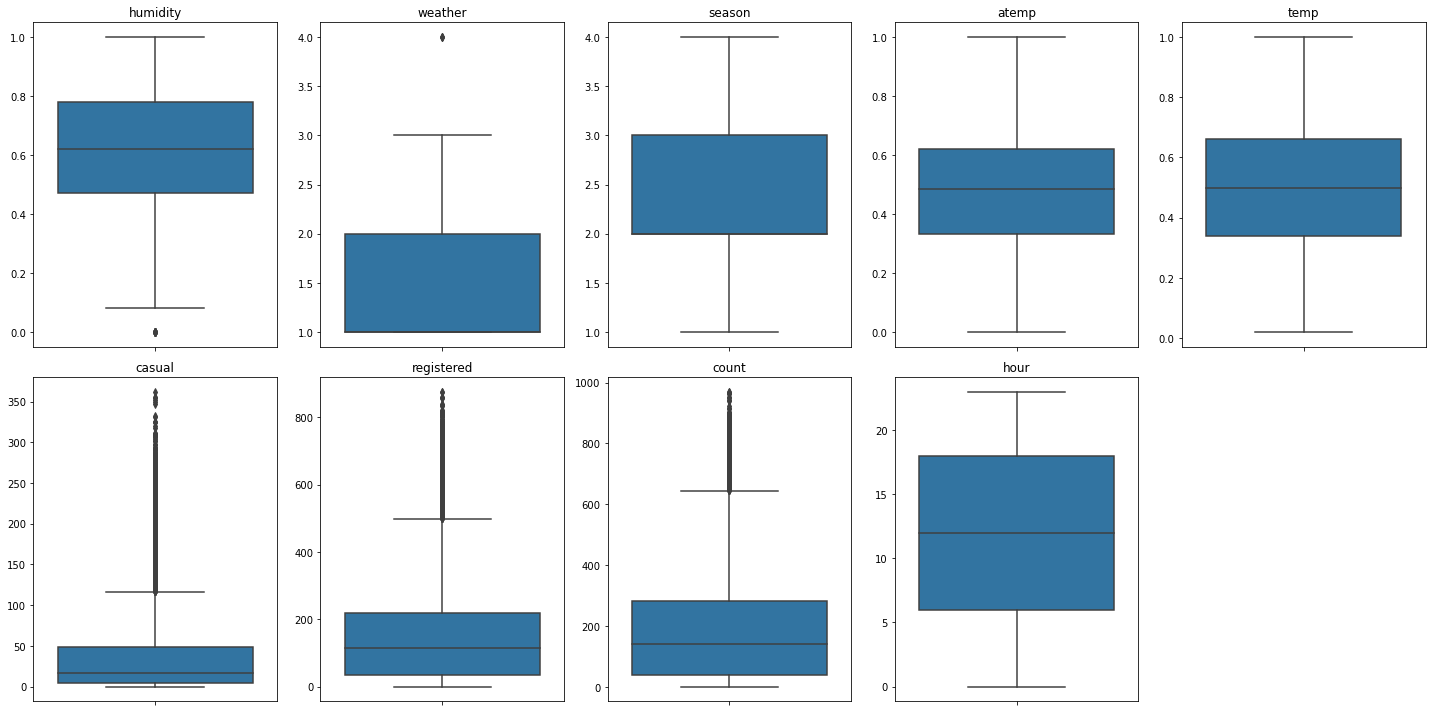

In [12]:
# Create Boxplot for Each Numerical Feature
import math
num = ['humidity', 'weather', 'season', 'atemp', 'temp', 'casual', 'registered', 'count', 'hour']
num_plots = len(num)
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()
for i in range(num_plots):
    sns.boxplot(y=df[num[i]], ax=axes[i])
    axes[i].set_title(num[i])
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


<b> There are outlier values in `Casual`, `Registered` and `Count`

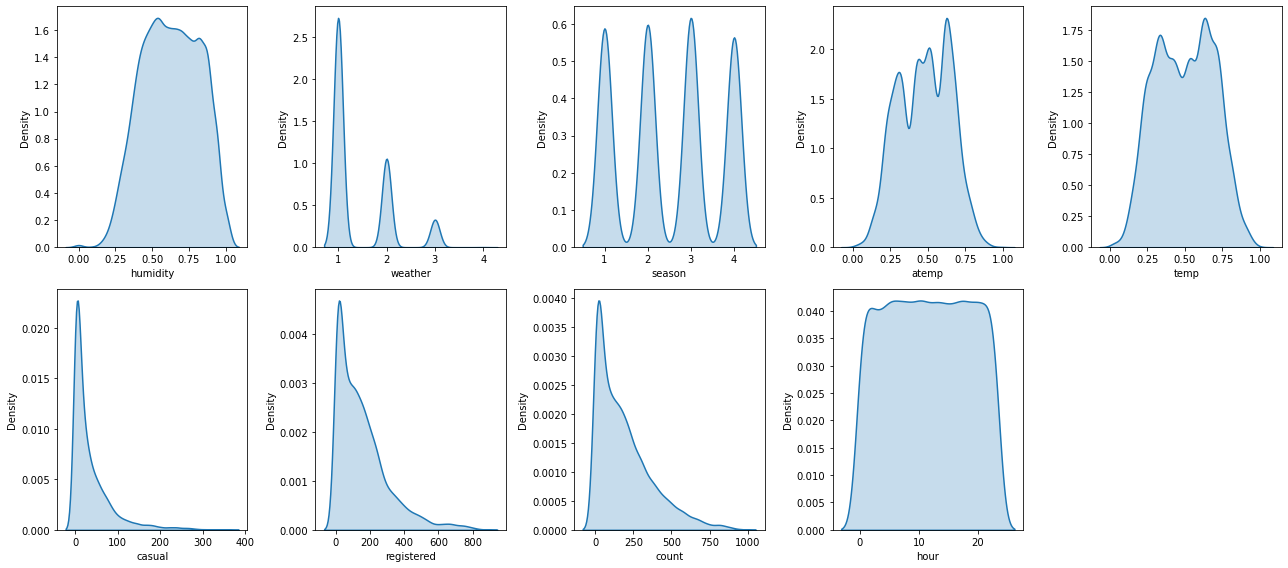

In [13]:
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(18, 8))
for i in range(len(num)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=df[num[i]], linewidth=1.5, shade=True)
    plt.xlabel(num[i])
    plt.tight_layout()


<b> 

*  `Humadity` have left skew distribution <br>
*  `Casual`, `Registered` and `Count` have right skew distribution <br>
* `Temp`, `Atemp` and `Hour` appear to be almost *normally distributed.*

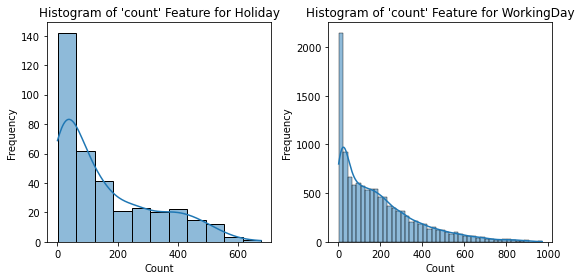

In [14]:
# Create Histogram (Distplot) for 'count' feature for holiday data
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['holiday'] == 1], x='count', kde=True)
plt.title("Histogram of 'count' Feature for Holiday")
plt.xlabel("Count")
plt.ylabel("Frequency")

# Create Histogram (Distplot) for 'count' feature for non-holiday data
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['holiday'] == 0], x='count', kde=True)
plt.title("Histogram of 'count' Feature for WorkingDay")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<b> The most rented bikes on working days.

In [15]:
#Visualizing Categorical Data
df_viz = df.copy()  # Create a copy of the original DataFrame

# create year, month columns
df_viz['year'] = df_viz['date'].dt.year
df_viz['month'] = df_viz['date'].dt.month
df_viz['dayname'] = df_viz['date'].dt.day_name()

# convert the data type from int to object
df_viz['holiday'] = df_viz['holiday'].astype(str)
df_viz['year'] = df_viz['year'].astype(str) 

# Change Month Type values into more understandable values
df_viz['month'] = df_viz['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
['Jan', 'Feb', 'Mar', 'April', 'Mei', 'Juni', 'Juli', 'Agust', 'Sep', 'Okt', 'Nov', 'Des'])

#map the season and weather dictionary to the season numerical column
seasons_mapping = {1: 'winter',
                   2: 'spring',
                   3: 'summer', 
                   4: 'fall'}
df_viz['season'] = df_viz['season'].map(seasons_mapping)

weather_mapping = {1: 'Clear',
                   2: 'Misty',
                   3: 'Light_rain', 
                   4: 'Heavy_rain'}
df_viz['weather'] = df_viz['weather'].map(weather_mapping)

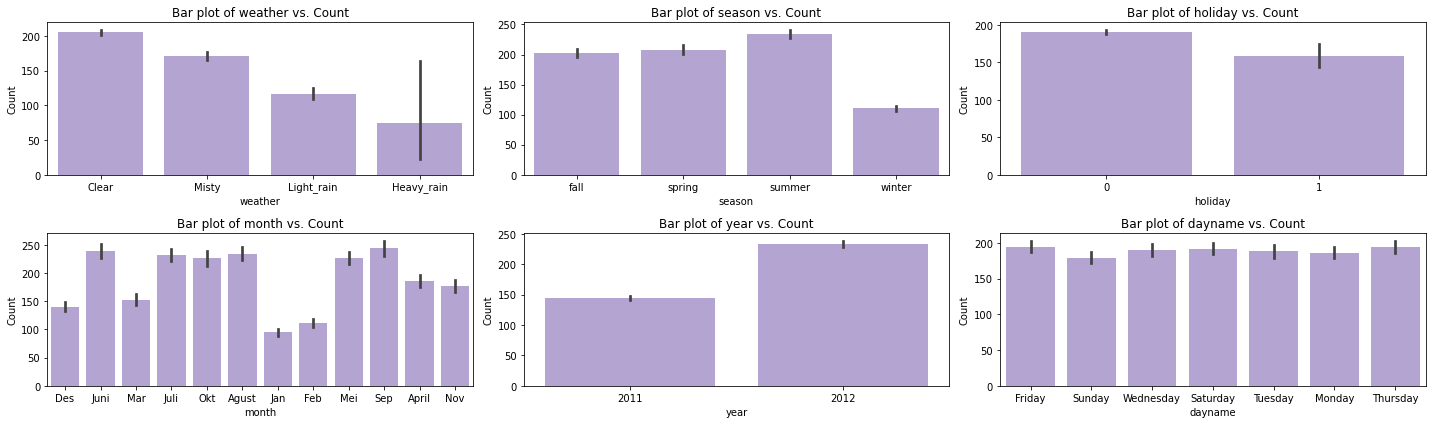

In [16]:
# Looks Relationships of Categorical Variabels with Target Variable
cate = ['weather', 'season', 'holiday', 'month', 'year', 'dayname']
soft_purple = "#b19cd9"

# Calculate the number of rows and columns for subplots
num_rows = len(cate) // 3 + (len(cate) % 3 > 0)
num_cols = 3

# Create subplots with improved layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 6))

# Flatten the axes array
axes = axes.flatten()

# Iterate through categorical features and create bar plot
for i, feature in enumerate(cate):
    ax = axes[i]
    sns.barplot(data=df_viz, x=feature, y='count', ax=ax, color=soft_purple)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar plot of {feature} vs. Count')

# Remove empty subplots if any
if len(cate) < num_rows * num_cols:
    empty_axes = axes[len(cate):]
    for ax in empty_axes:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [17]:
# Count Categorical Feature
for col in cate:
    print(f'''Data Value count kolom {col}: ''')
    print(df_viz[col].value_counts())
    print()

Data Value count kolom weather: 
Clear         8071
Misty         3119
Light_rain     972
Heavy_rain       3
Name: weather, dtype: int64

Data Value count kolom season: 
summer    3169
spring    3074
winter    3023
fall      2899
Name: season, dtype: int64

Data Value count kolom holiday: 
0    11803
1      362
Name: holiday, dtype: int64

Data Value count kolom month: 
Juli     1058
Mei      1053
Agust    1035
Mar      1027
Des      1021
Sep      1018
Juni     1006
Jan      1003
Nov       999
April     997
Okt       981
Feb       967
Name: month, dtype: int64

Data Value count kolom year: 
2012    6106
2011    6059
Name: year, dtype: int64

Data Value count kolom dayname: 
Wednesday    1769
Saturday     1756
Thursday     1753
Friday       1730
Tuesday      1724
Sunday       1723
Monday       1710
Name: dayname, dtype: int64



**Observation**

* The number of `heavy rain` occurrences is very small, then the value will be moved to `light rain` <br> 
* The most popular `season` for bike rentals is `Summer`. <br>
* The most rented bikes on `working days`.<br> 
* The month of `July` has the highest number of bike rentals. <br>
* In `2012`, there were more bike rentals compared to 2011.<br>
* here is no significant difference in the number of bicycles rented within a week<br>
* Demand for bike rentals is high during `4 PM (16:00) until 7 PM (19:00)`.


## **Bivariate Analysis**

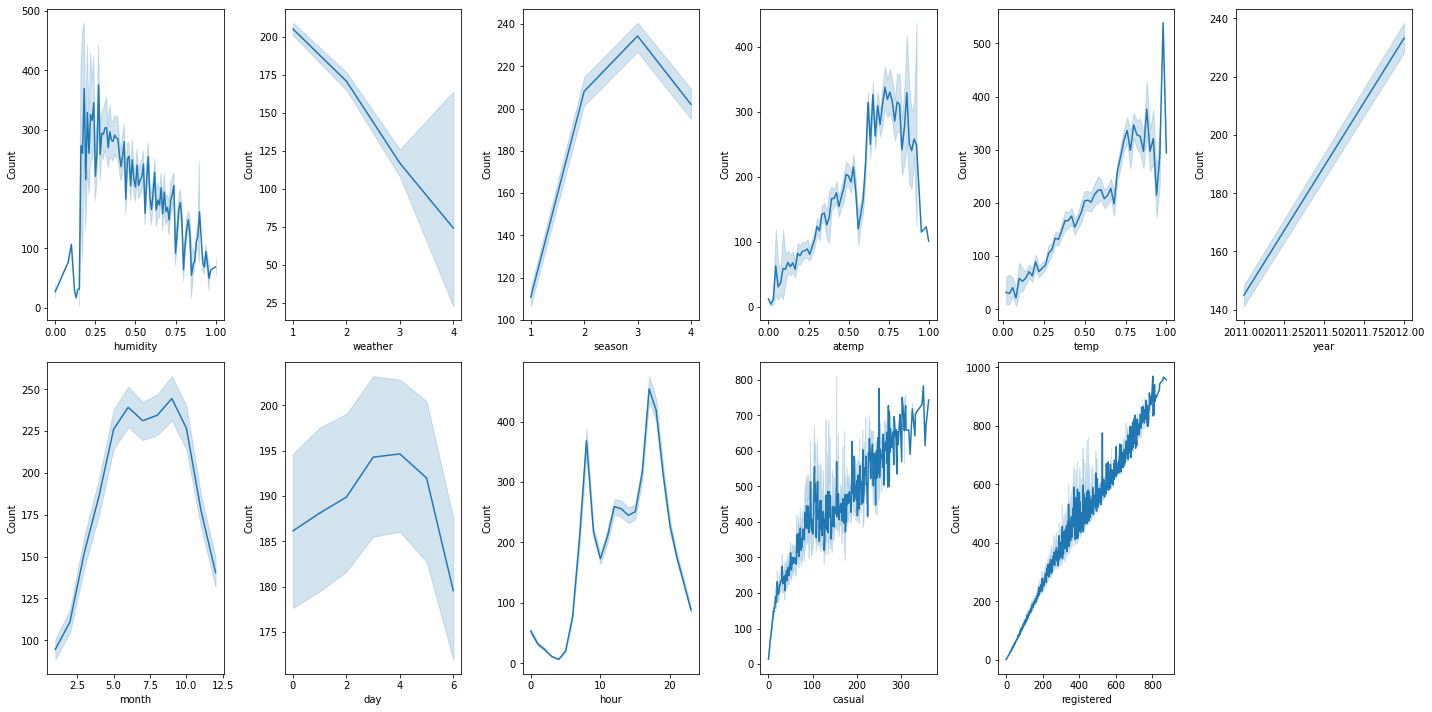

In [18]:
# Create Lineplot numerical features 

num = ['humidity', 'weather', 'season', 'atemp', 'temp', 'year', 'month', 'day', 'hour', 'casual', 'registered']

num_plots = len(num)
num_rows = 2
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_plots):
    ax = axes[i]
    sns.lineplot(x=num[i], y='count', data=df, ax=ax)
    ax.set_xlabel(num[i])
    ax.set_ylabel('Count')

# Remove empty subplots if any
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



[Text(0.5, 1.0, 'Count of Rented bikes acording to holiday_workingday ')]

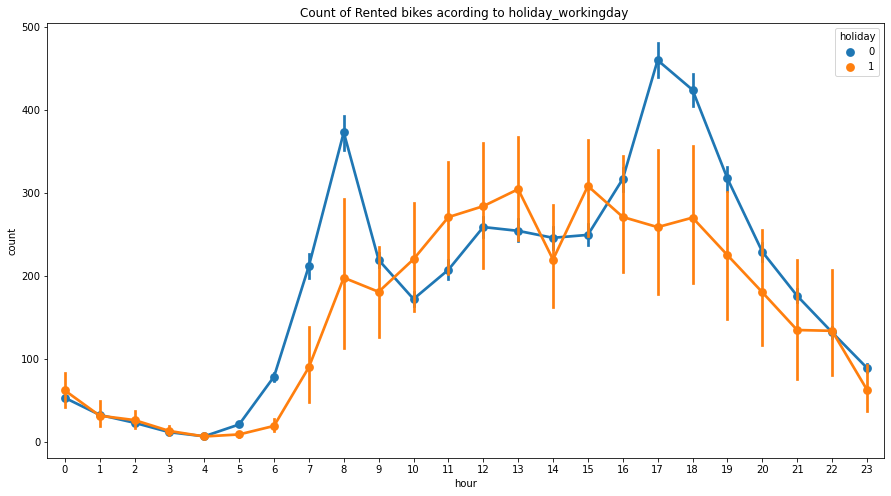

In [19]:
# Plotting Count based on Hour and Holiday
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=df,x='hour',y='count',hue='holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to holiday_workingday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

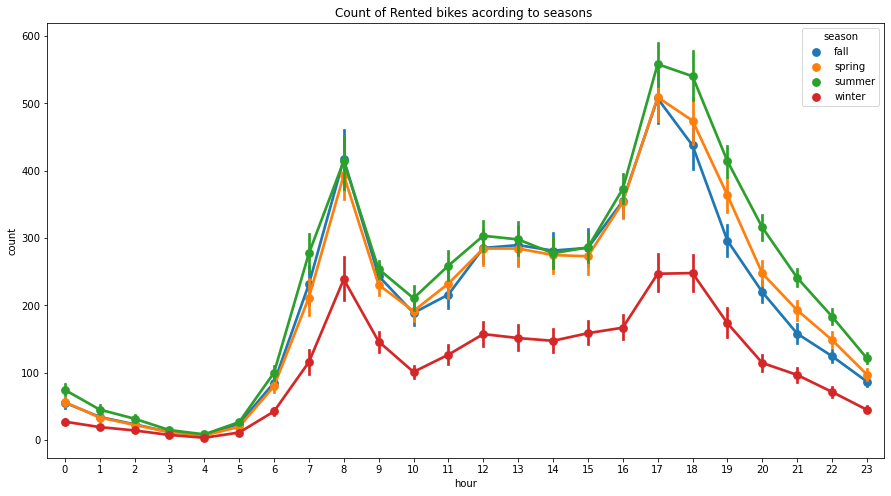

In [20]:
# Count based on Season 
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data= df_viz,x ='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

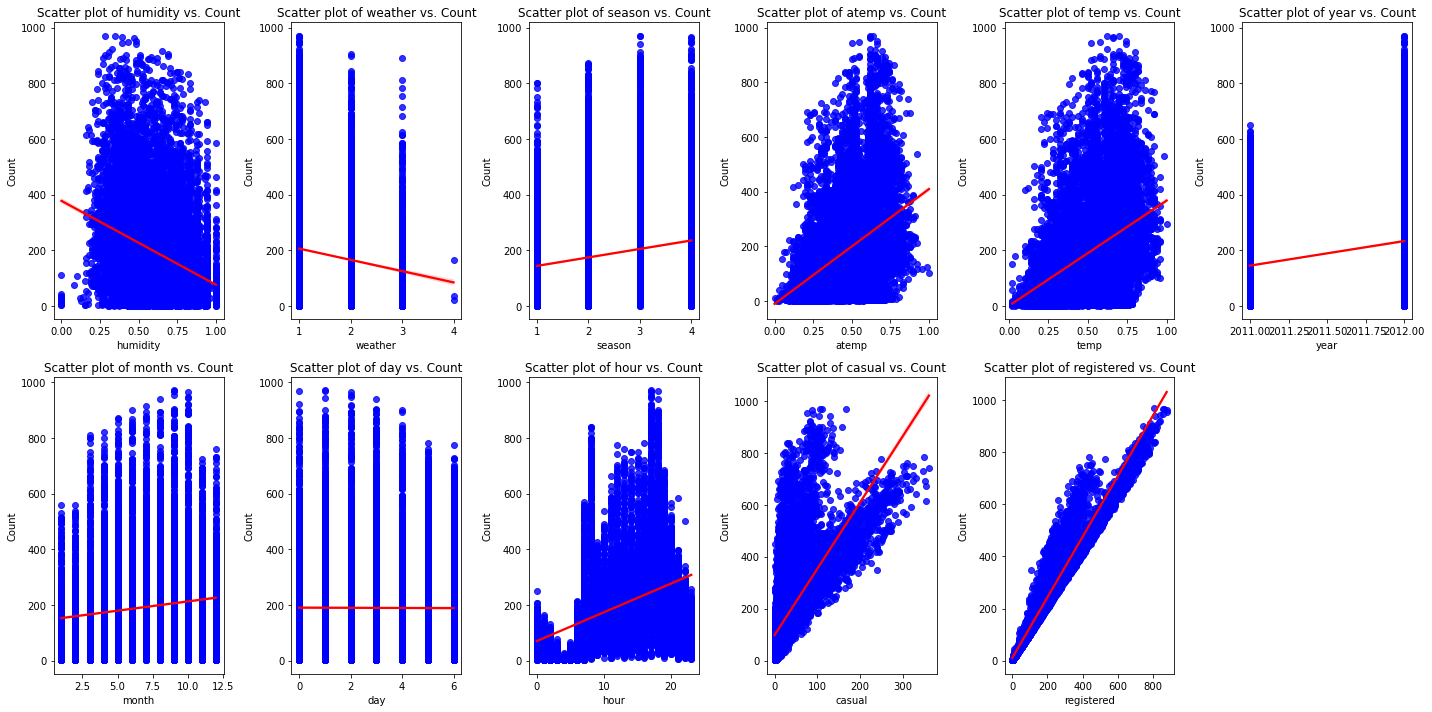

In [21]:
# Looks Relationship of continous variables with target variable
num = ['humidity', 'weather', 'season', 'atemp', 'temp', 'year', 'month', 'day', 'hour', 'casual', 'registered']

num_plots = len(num)
num_rows = 2
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_plots):
    ax = axes[i]
    sns.regplot(data=df, x=num[i], y='count', ax=ax, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    ax.set_xlabel(num[i])
    ax.set_ylabel('Count')
    ax.set_title(f'Scatter plot of {num[i]} vs. Count')

# Remove empty subplots if any
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Observation**

* The demand for bicycles shows a similar and positive relationship with `atemp`,`temp`,`year`,`month`,`day`, `season` and `hour` <br> 
* The demand for bicycles shows an inverse relationship with `humidity` and `weather` <br>
* The demand for bicycles is positively correlated with the number of `casual` and `registered` users.<br> 
* The demand for bicycles is strongly explained by `registered` users.

# <b> **Pre Processing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [22]:
# duplicate dataframe
df_model = df.copy()

In [23]:
# information df_model
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,date,datetime64[ns],0,0.0,731,"[2011-05-12T00:00:00.000000000, 2011-09-17T00:..."
1,humidity,float64,0,0.0,89,"[0.26, 0.82]"
2,weather,int64,0,0.0,4,"[3, 4]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[2, 1]"
5,atemp,float64,0,0.0,65,"[0.3636, 0.6667]"
6,temp,float64,0,0.0,50,"[0.78, 0.7]"
7,hour,int64,0,0.0,24,"[0, 3]"
8,casual,int64,0,0.0,305,"[109, 231]"
9,registered,int64,0,0.0,742,"[545, 399]"


In [24]:
# Check Missing Value 
df_model.isnull().sum()

date          0
humidity      0
weather       0
holiday       0
season        0
atemp         0
temp          0
hour          0
casual        0
registered    0
count         0
year          0
month         0
day           0
dtype: int64

In [25]:
# Check Duplicated Data

print(f'Number of duplicated data = {df.duplicated().sum()}')

Number of duplicated data = 0


<b> The df_model dataset does not have any missing values or duplicate data

## **Data Correlation**

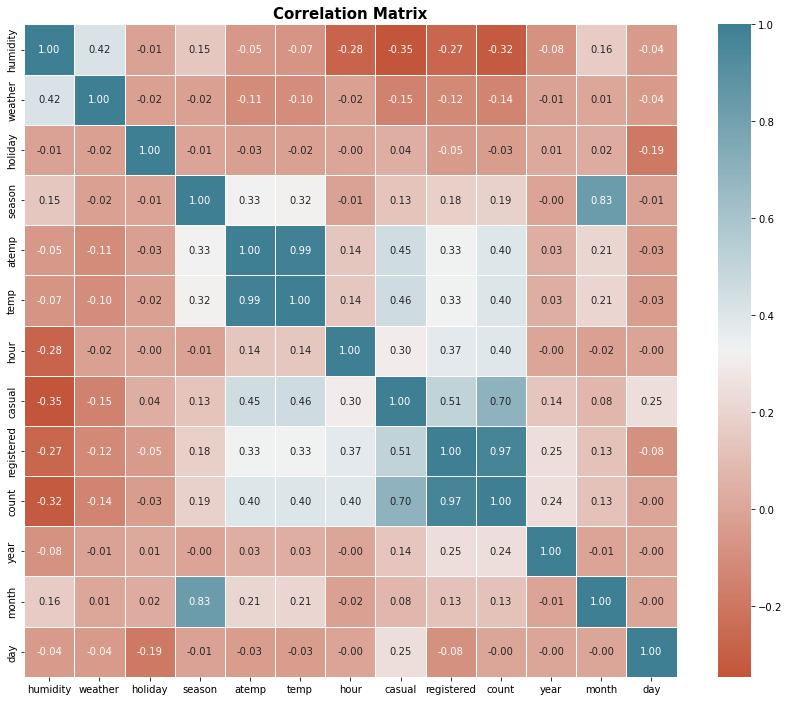

In [26]:
# Create Heatmap Correlation Chart for Each Numerical Features
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

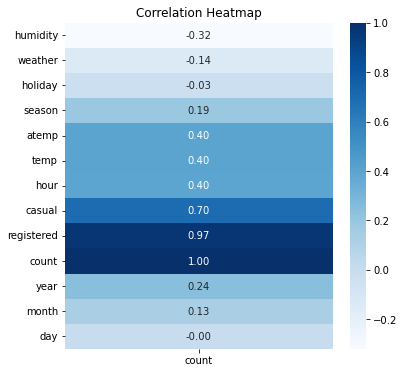

In [27]:
# Create Heatmap Correlation Chart for Each Numerical to Target Features

plt.figure(figsize=(6, 6))
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix[['count']], cmap='Blues', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Observation**

* `Registered` and `Casual` is slightly high positive corelated to target feature `Count`. Since both of them contain the same information as `Count`.
* `Temp` and `Atemp` have positive strong correlation each other.Therefore, one of them will be removed to avoid multicollinearity in the analysis. <br> 
* `Humidity` , `weather` and `holiday` have negative correlation with target feature `Count`.<br>
* `Atemp`, `temp` `Hour` a positive correlation, indicating a tendency for the number of bikes rented to increase with higher temperatures and during certain hours of the day.<br> 
* `Season`,`month` and `year` a weak positive correlation, indicating a small relationship between the season and the number of bikes rented.
* `day` has no clear positive or negative linear relationship with the target,Although the linear correlation between the feature and the target is -0.00, there may still be a non-linear relationship or important dependency between them.

## **Drop Unused Feature**

In [28]:
# Check value 
df_model['weather'].value_counts()

1    8071
2    3119
3     972
4       3
Name: weather, dtype: int64

In [29]:
# moving the data from heavy rain to light rain
df_model.loc[df['weather'] == 4, 'weather'] = 3

# Check Value after moving 
df_model['weather'].value_counts()

1    8071
2    3119
3     975
Name: weather, dtype: int64

In [30]:
# drop Columns
df_model.drop(labels=['date','casual', 'registered','temp'], axis=1, inplace=True)

**Observation**

* Dropping the `date` column as the data has been transferred to another column.
* `Casual` and `Registered` columns contain information that is already captured in the "count" column, making them redundant. By removing these columns, we eliminate the risk of multicollinearity and reduce the complexity of the model.
* `temp` column is dropped based on the decision mentioned earlier to remove one of the highly correlated features (`temp` and `atemp`). Since `atemp` was chosen to be kept, `temp` can be dropped to avoid redundancy and reduce dimensionality.
By removing these columns, we can simplify the dataset, enhance model performance, and prevent potential issues such as overfitting.

## **Outlier Detection**

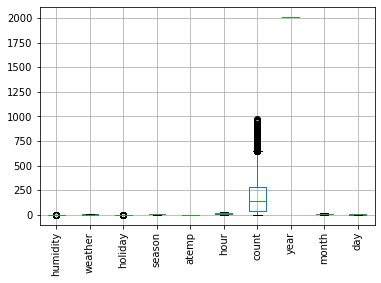

In [31]:
#Plotting a boxplot to check for outliers
df_model.boxplot(rot=90);

In [32]:
#Creating a function to check for outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [33]:
# Outliers in the 'count' feature
find_anomalies(df_model['count'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


In [34]:
# Outliers in the 'atemp' feature
find_anomalies(df_model['atemp'])

IQR: 0.2879
limit_bawah: -0.09854999999999997
limit_atas: 1.0530499999999998


In [35]:
#"Outliers in the 'humidity' feature
find_anomalies(df_model['humidity'])

IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245


In [36]:
#"Outliers in the 'humidity' feature
find_anomalies(df_model['weather'])

IQR: 1.0
limit_bawah: -0.5
limit_atas: 3.5


In [37]:
# Display Statistic Value of Numerical Features Before Outlier Handling

df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
humidity,12165.0,0.625451,0.192102,0.0,0.4700,0.6200,0.7800,1.0
weather,12165.0,1.416687,0.635128,1.0,1.0000,1.0000,2.0000,3.0
holiday,12165.0,0.029758,0.169925,0.0,0.0000,0.0000,0.0000,1.0
season,12165.0,2.488615,1.106157,1.0,2.0000,2.0000,3.0000,4.0
atemp,12165.0,0.476996,0.171857,0.0,0.3333,0.4848,0.6212,1.0
hour,12165.0,11.519770,6.931872,0.0,6.0000,12.0000,18.0000,23.0
count,12165.0,189.271023,181.223903,1.0,40.0000,142.0000,282.0000,970.0
year,12165.0,2011.501932,0.500017,2011.0,2011.0000,2012.0000,2012.0000,2012.0
month,12165.0,6.510974,3.433995,1.0,4.0000,7.0000,9.0000,12.0
day,12165.0,3.005261,1.992993,0.0,1.0000,3.0000,5.0000,6.0


## **Feature Engineering**

Selanjutnya, kita dapat memulai feature engineering terhadap fitur fitur numerikal

In [38]:
# Display Statistic Value Before Outlier Handling
df_model['count'].describe()

count    12165.000000
mean       189.271023
std        181.223903
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: count, dtype: float64

In [39]:
# Check lower upper Column count 
lower_count = df_model[df_model['count'] < -323.0].count()['count']
upper_count = df_model[df_model['count'] > 645.0].count()['count']

print("Jumlah data di luar batas bawah:", lower_count)
print("Jumlah data di luar batas atas:", upper_count)

Jumlah data di luar batas bawah: 0
Jumlah data di luar batas atas: 338


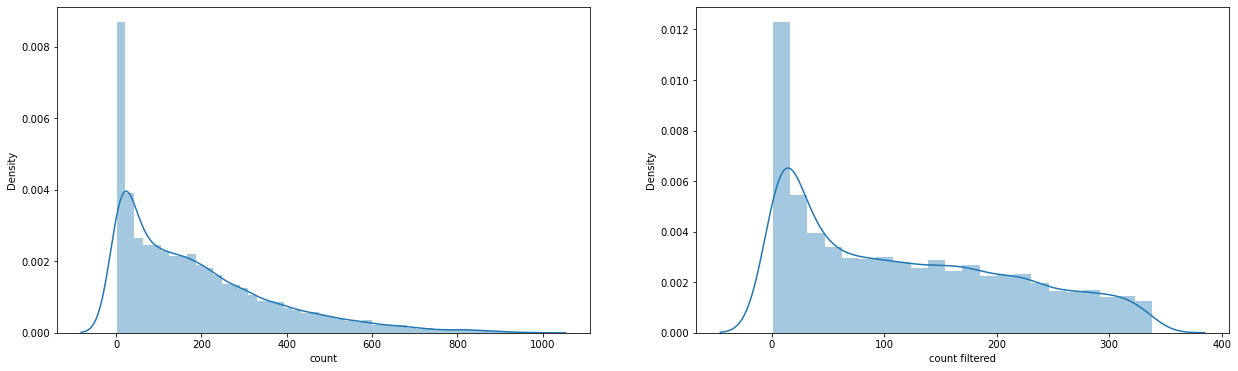

In [40]:
# Filtering The Data 
df_model = df_model[(df_model['count'] <= upper_count)]
# Plotting distribution before and After
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['count'], ax=axes[0])
sns.distplot(df_model['count'], ax=axes[1])
axes[0].set_xlabel('count')
axes[1].set_xlabel('count filtered');

In [41]:
# Display Statistic Value After Outlier Handling
df_model['count'].describe()

count    9935.000000
mean      119.492199
std        97.967627
min         1.000000
25%        27.000000
50%       101.000000
75%       195.000000
max       338.000000
Name: count, dtype: float64

In [42]:
# Display Statistic Value of Numerical Features After Outlier Handling

df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
humidity,9935.0,0.644016,0.191238,0.0,0.490,0.6500,0.8100,1.0
weather,9935.0,1.448515,0.654806,1.0,1.000,1.0000,2.0000,3.0
holiday,9935.0,0.030096,0.170859,0.0,0.000,0.0000,0.0000,1.0
season,9935.0,2.413790,1.133166,1.0,1.000,2.0000,3.0000,4.0
atemp,9935.0,0.453416,0.170383,0.0,0.303,0.4545,0.5909,1.0
hour,9935.0,10.855058,7.255867,0.0,4.000,10.0000,17.0000,23.0
count,9935.0,119.492199,97.967627,1.0,27.000,101.0000,195.0000,338.0
year,9935.0,2011.456366,0.498118,2011.0,2011.000,2011.0000,2012.0000,2012.0
month,9935.0,6.357524,3.565376,1.0,3.000,6.0000,10.0000,12.0
day,9935.0,2.974836,1.991114,0.0,1.000,3.0000,5.0000,6.0


## **Clean Dataset**

In [43]:
# Check The Data 
df_model.head(2) 

,humidity,weather,holiday,season,atemp,hour,count,year,month,day
0,0.62,1,0,4,0.3485,16,250,2011,12,4
1,0.64,1,0,2,0.5152,4,18,2012,6,6


# <b> **Modeling**

In [44]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## **Data Splitting**

In [46]:
#Assign the value in X and Y
X = df_model.drop(columns=['count'], axis=1)
y = df_model['count']

## **Train and Test**

In [47]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2020)

In [48]:
#X_train

In [49]:
#X_test

## **Feature Selection**

In [50]:
#Univariate feature selection 
from sklearn.feature_selection import f_regression

# Menghitung nilai F-statistik dan p-value
f_statistic, p_values = f_regression(X, y)

# Menampilkan hasil
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, F-statistic: {f_statistic[i]}, p-value: {p_values[i]}")

Feature: humidity, F-statistic: 1135.079810006192, p-value: 1.0292570900189605e-235
Feature: weather, F-statistic: 107.69999313570884, p-value: 4.200903108680645e-25
Feature: holiday, F-statistic: 14.297864794249767, p-value: 0.00015695628792546652
Feature: season, F-statistic: 205.65608838402363, p-value: 3.516329543379043e-46
Feature: atemp, F-statistic: 1375.08911969303, p-value: 5.046752184112228e-282
Feature: hour, F-statistic: 3095.3798018448483, p-value: 0.0
Feature: year, F-statistic: 117.99224538283374, p-value: 2.4788722734034548e-27
Feature: month, F-statistic: 97.01119064245373, p-value: 8.76506410933925e-23
Feature: day, F-statistic: 6.737370791547408, p-value: 0.009455259320082844


Berdasarkan hasil F-statistik dan p-value yang diperoleh, kita dapat membuat beberapa kesimpulan:

- Semua fitur memiliki nilai F-statistik yang cukup tinggi, menunjukkan bahwa terdapat hubungan antara fitur-fitur tersebut dengan target.<br>
- Nilai p-value yang sangat kecil (lebih kecil dari tingkat signifikansi yang umumnya digunakan, misalnya 0.05) menunjukkan bahwa fitur-fitur tersebut memiliki hubungan yang signifikan dengan target.<br>
- Fitur humidity, weather, holiday, season, atemp, hour, year, month, dan day memiliki nilai p-value yang sangat kecil, mendekati nol. Hal ini menunjukkan bahwa fitur-fitur tersebut secara signifikan berkontribusi terhadap prediksi target.<br>
- Hasil p-value yang cukup kecil pada fitur day (0.009455) menunjukkan bahwa fitur ini memiliki hubungan yang signifikan dengan target, meskipun tidak sekuat fitur-fitur lainnya.<br>

Kesimpulan yang dapat diambil adalah fitur-fitur tersebut memiliki pengaruh yang penting dalam memprediksi target. Oleh karena itu, fitur-fitur ini sebaiknya dipertahankan dalam model prediksi yang akan dibangun.

## **Choose a Benchmark Model**

In [51]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

    estimator = Pipeline([
       ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-96.85263206 -89.47010567 -93.54208408 -96.75500174 -91.18123036] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-69.02077314 -63.69077137 -67.82303106 -69.45194212 -65.01852503] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.43820153 -1.26639675 -1.2319232  -1.37474138 -1.48197294] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-63.16883729 -62.00689682 -64.61882751 -63.01433777 -61.93723246] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-42.53333326 -41.87293945 -43.58935597 -42.09217613 -41.43516158] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.

In [52]:
# The evaluation of the results from the 5 candidate algorithms used.
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-93.560211,2.947391,-67.001009,2.264957,-1.358647,0.096298
1,KNN Regressor,-62.949226,0.974900,-42.304593,0.733525,-0.891022,0.073711
2,DecisionTree Regressor,-46.925262,1.561447,-29.071748,0.670450,-0.441255,0.023571
3,RandomForest Regressor,-34.357187,1.073988,-21.650891,0.563315,-0.314972,0.015171
4,XGBoost Regressor,-31.084592,1.312210,-20.059161,0.797600,-0.288937,0.015013


Model-model dievaluasi berdasarkan berbagai metrik seperti RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error).Semakin rendah nilai RMSE, MAE, dan MAPE, semakin baik kinerja model tersebut
- XGBoost Regressor memiliki nilai rata-rata RMSE, MAE, dan MAPE yang paling rendah dibandingkan dengan model lainnya. Oleh karena itu, XGBoost adalah model terbaik.
- RandomForest Regressorjuga menunjukkan performa yang baik dengan nilai rata-rata RMSE, MAE, dan MAPE yang cukup rendah. maka bisa dianggap sebagai model terbaik kedua.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

## **Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [53]:
# Benchmark 2 best model
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=2020)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediction data test 
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2 square': score_r2}, index=models.keys())
score_before_tuning


,RMSE,MAE,MAPE,R2 square
XGB,30.596020,20.543584,0.426758,0.903871
RandomForest,32.002799,21.151333,0.376723,0.894828


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.

## **Hyperparameter Tuning**

* Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [54]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
  'model__reg_alpha': reg_alpha}

In [55]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=3, shuffle=True, random_state=2020)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [56]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamm...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [57]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,split2_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.952951,0.017372,0.021287,0.002003,0.9,0.059948,119,8,0.05,5,...,-20.785493,-21.651591,0.680140,1,-0.461617,-0.425657,-0.486256,-0.457843,0.024883,1
20,0.487109,0.011427,0.012968,0.001411,0.9,0.007743,143,4,0.38,6,...,-21.747447,-22.687540,0.751344,2,-0.607925,-0.590377,-0.712082,-0.636795,0.053716,3
43,0.854864,0.030425,0.021278,0.002489,0.5,0.16681,172,5,0.31,7,...,-22.715953,-23.424047,0.680497,3,-0.604007,-0.611682,-0.697555,-0.637748,0.042406,4
17,0.983710,0.038313,0.017126,0.001031,0.6,0.001,190,5,0.04,9,...,-22.770223,-23.591675,0.599668,4,-0.518283,-0.483379,-0.517275,-0.506312,0.016221,2
8,0.863506,0.000227,0.018618,0.001243,0.7,0.021544,182,6,0.31,2,...,-23.592682,-24.188557,0.511536,5,-0.681679,-0.710048,-0.862207,-0.751311,0.079266,6


In [58]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -32.32267065820054
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


Dengan menggunakan parameter-parameter tersebut, model XGBoost memberikan skor terbaik dalam memprediksi jumlah sepeda yang disewa.

## **Predict Test Set with Tuned Model**

In [59]:
from sklearn.metrics import r2_score

# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)


score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R2 square': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2 square
XGB,31.136462,21.402922,0.448538,0.900445


## **Performance Comparison**

In [60]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R2 square
XGB,30.59602,20.543584,0.426758,0.903871


In [61]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE,R2 square
XGB,31.136462,21.402922,0.448538,0.900445


meskipun terjadi peningkatan sedikit disemua metrik setelah dilakukan hyperparameter tuning,kesalahan dan penurunan dalam kemampuan menjelaskan variasi target, hasil setelah hyperparameter tuning masih cukup baik.

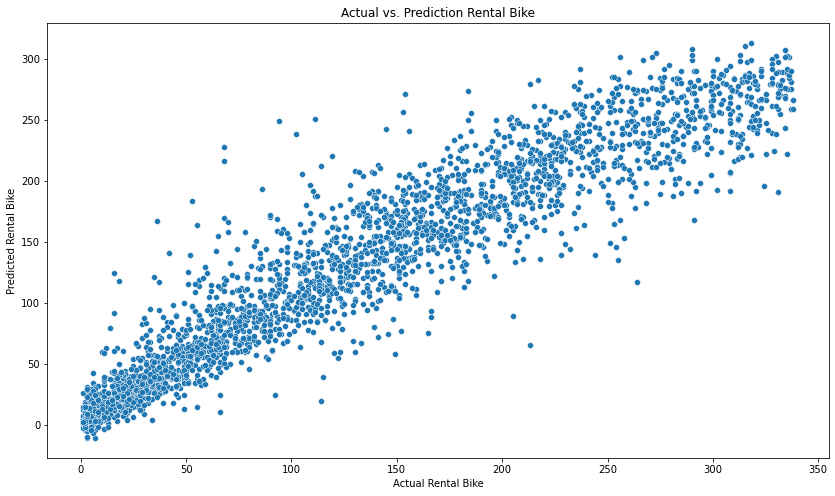

In [62]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Rental Bike', 
                                               xlabel='Actual Rental Bike', 
                                               ylabel='Predicted Rental Bike');

## **Feature Importance**

* model.feature_importances_ untuk menghitung tingkat kepentingan fitur berdasarkan kontribusinya dalam memprediksi target (jumlah sepeda yang disewa).

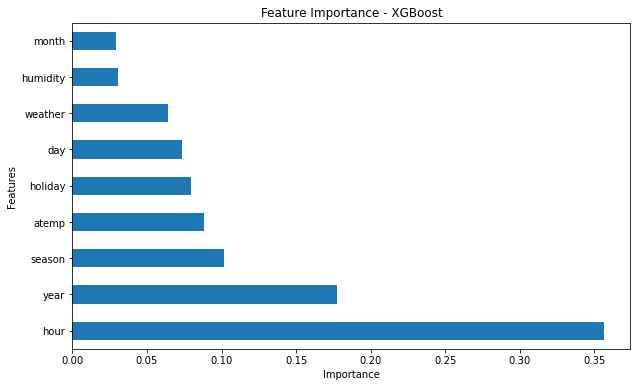

In [63]:
# Create Feature Importance
import xgboost as xgb
import matplotlib.pyplot as plt
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_imp.head(10).plot(kind='barh')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Berdasarkan **feature importance** yang dihasilkan oleh model XGBoost, kita dapat melihat bahwa: 
- Fitur Hour ini menunjukkan kontribusi yang relatif lebih besar dibandingkan dengan fitur-fitur lainnya dalam memprediksi jumlah sepeda yang disewa. Fitur Hour mungkin menunjukkan pola atau tren yang sangat signifikan dalam data, sehingga memiliki pengaruh yang kuat terhadap prediksi model.

- fitur Year menunjukkan seberapa pentingnya informasi tahun dalam mempengaruhi jumlah "count" yang diprediksi oleh model. karena dapat memberikan pola atau tren temporal yang signifikan 

- Fitur Season (Musim) menunjukkan pentingnya musim dalam prediksi jumlah sepeda yang disewa. Musim tertentu mungkin memiliki permintaan yang lebih tinggi daripada musim lainnya.

- Fitur atemp menunjukkan pentingnya suhu saat ini dalam prediksi jumlah sepeda yang disewa. Semakin tinggi atau rendah suhu, dapat mempengaruhi permintaan sepeda.

- Fitur Holiday (Hari Libur) menunjukkan pentingnya hari libur dalam prediksi jumlah sepeda yang disewa. Pada hari libur, permintaan sepeda mungkin berbeda dibandingkan dengan hari-hari biasa.

- fitur day menunjukkan bahwa informasi tentang hari dalam sebulan mungkin memiliki pengaruh yang kurang signifikan dalam memprediksi jumlah sepeda yang dipinjam

- Fitur Weather (Cuaca) menunjukkan pentingnya kondisi cuaca dalam prediksi jumlah sepeda yang disewa. Cuaca yang baik atau buruk dapat mempengaruhi minat orang untuk menyewa sepeda.

-  fitur humidity menunjukkan bahwa tingkat kelembaban udara memiliki pengaruh terhadap pola peminjaman sepeda. Hal ini bisa disebabkan oleh keterkaitan cuaca dan kondisi lingkungan dengan preferensi atau kebutuhan orang untuk menggunakan sepeda

- fitur month, kita dapat menyimpulkan bahwa faktor waktu atau musim memiliki peran yang penting dalam memprediksi jumlah peminjaman sepeda.hal itu dapat disebabkan oleh pola musiman atau tren yang terkait dengan aktivitas penyewaan sepeda. Misalnya, mungkin terdapat peningkatan aktivitas peminjaman sepeda pada bulan-bulan tertentu seperti musim panas atau bulan-bulan liburan.

Dengan demikian, kesimpulannya adalah fitur-fitur tersebut memiliki pengaruh signifikan terhadap prediksi jumlah sepeda yang disewa.entingnya faktor-faktor seperti jam, tahun, bulan, hari, suhu, cuaca, musim, dan hari libur perlu diperhatikan dalam menganalisis dan memprediksi permintaan sepeda.





In [64]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## **SHAP VALUE**

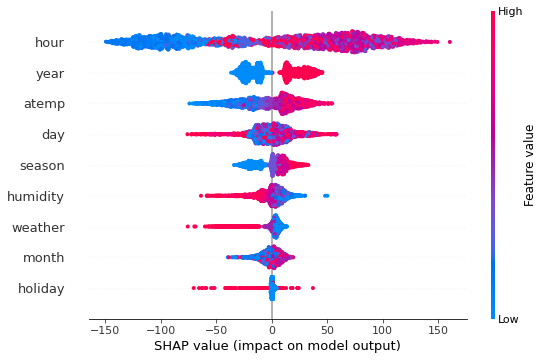

In [65]:
# Create Shap Value 
import xgboost as xgb
import shap

# Training the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Creating the explainer object
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Plotting the SHAP summary plot
shap.summary_plot(shap_values, X_test)



Berikut kesimpulan berdasarkan **SHAP Value**: 
    
**Hour** <br> 
feature Hour ini menunjukkan bahwa nilai "hour" yang lebih tinggi (misalnya, jam puncak) memiliki kontribusi positif yang lebih besar terhadap hasil prediksi model. Artinya, pada jam-jam tertentu, prediksi jumlah sepeda yang disewa cenderung meningkat.

**Year**<br> 
feature Year menunjukkan adanya hubungan yang positif dengan prediksi atau jumlah bike sharing. Artinya semakin tinggi nilai year, semakin tinggi pula prediksi atau jumlah bike sharing. Ini bisa diartikan bahwa seiring berjalannya waktu, bike sharing mengalami peningkatan atau menjadi lebih populer dari tahun ke tahun.

**Atemp** <br> 
feature Atemp menunjukkan bahwa nilai "atemp" yang lebih tinggi memiliki kontribusi positif terhadap hasil prediksi model. Artinya, ketika suhu yang dirasakan (atemp) meningkat, prediksi jumlah sepeda yang disewa cenderung meningkat.

**Day**<br>
feature Day menunjukkan bahwa adanya hubungan negatif dengan prediksi atau jumlah bike sharing. ketika nilai day lebih rendah (misalnya dari 31 ke 1).
Artinya semakin rendah nilai day, prediksi atau jumlah bike sharing cenderung menurun secara signifikan. (misalnya, hari-hari awal bulan) cenderung memiliki pengaruh yang lebih negatif terhadap jumlah bike sharing.

**Season**<br> 
feature Season memberikan gambaran tentang bagaimana nilai-nilai musim tertentu mempengaruhi permintaan sepeda. dapat menyimpulkan bahwa musim yang lebih hangat dan cerah (misalnya, musim panas) memiliki pengaruh positif yang lebih besar terhadap permintaan sepeda yang disewa, sementara musim yang lebih dingin (misalnya, musim dingin) memiliki pengaruh negatif yang lebih besar terhadap permintaan sepeda.

**Humidity**<br>
feature Humidity ini menunjukkan adanya korelasi negatif dengan output model.bahwa adanya peningkatan kelembaban (humidity) cenderung memiliki pengaruh negatif pada permintaan sepeda. Dalam konteks ini, semakin tinggi tingkat kelembaban, kemungkinan permintaan sepeda akan cenderung lebih rendah.

**weather**<br>
feature Weather menunjukkan bahwa kondisi cuaca tertentu yang diwakili oleh nilai fitur Weather memiliki pengaruh negatif pada permintaan sepeda. Dalam konteks ini, jika nilai Weather semakin tinggi (misalnya dari kondisi cerah ke kondisi hujan), kemungkinan permintaan sepeda akan cenderung lebih rendah.

**Month**<br>
feature Month memiliki hubungan negatif yang signifikan dengan prediksi atau jumlah bike sharing. Artinya, terdapat pola di mana ketika nilai month bulan-bulan tertentu (biasanya di musim yang lebih hangat atau saat liburan), aktivitas bike sharing cenderung meningkat.

**Holiday**<br> 
feature Holiday menunjukkan bahwa ketika fitur Holiday memiliki nilai "1" (hari libur), itu memiliki pengaruh negatif pada permintaan sepeda. Dalam konteks ini, pada hari libur, permintaan sepeda cenderung lebih rendah dibandingkan dengan hari non-libur.

# <b> **Conclusion**

## <b> **Data Analysis**

Berdasarkan hasil **Exploratory Data Analysis** pada dataset bike sharing, dapat ditarik kesimpulan sebagai berikut:

- Tahun **2012** mewakili jumlah persewaan sepeda terbanyak
- Permintaan sepeda cenderung meningkat sejak bulan **Mei hingga Oktober**, hal menunjukkan peningkatan penggunaan sepeda selama musim panas dan musim gugur.
- Jumlah permintaan sepeda hampir sama setiap **harinya**
- **Jam** dengan jumlah sewa sepeda terbanyak adalah pada pukul 7 dan 8 pagi serta antara pukul 17 hingga 19, kemungkinan karena saat itu(jam sibuk saat orang berangkat dan pulang dari pekerjaan).
- banyak nya pengguna yang sudah **registered** (terdafatar) daripada pengguna **casual** 
- **Weather** dengan jumlahpersewaan sepeda terbanyak adalah kondisi cuaca cerah (clear).
- (Musim) **season** dengan jumlah sepeda yang disewa terbanyak adalah (musim panas) **summer** dan (musim semi)**spring**.
- Jumlah sepeda yang paling banyak disewa terjadi pada (non holiday) **working day**.
- Rentang nilai **atemp** (temperatur yang dirasakan) dan **humidity** (kelembaban) yang paling sering menghasilkan jumlah sepeda disewa adalah berkisar antara 0 hingga 1.


## <b> **Modeling & Model Evaluation**

In [66]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R2 square
XGB,30.59602,20.543584,0.426758,0.903871


Berdasarkan hasil **evaluasi model**, kita dapat mencapai kesimpulan sebagai berikut:

- Dari enam model yang dievaluasi, XGBoost Regressor menunjukkan performa terbaik tanpa melakukan hyparameter tuning.
- Performa model XGBoost Regressor diukur menggunakan beberapa metrik evaluasi, seperti RMSE, MAE, MAPE, dan R2 square.
- Hasil evaluasi menunjukkan bahwa model XGBoost Regressor memiliki Performa yang lebih rendah pada metrik RMSE dan MAE menunjukkan bahwa model memiliki tingkat kesalahan yang relatif kecil dalam memprediksi jumlah sepeda yang dipinjam.
- Nilai MAPE sebesar 0.426758 menunjukkan bahwa rata-rata kesalahan prediksi jumlah sepeda yang dipinjam adalah sebesar 42.67% dari nilai sebenarnya.
- Nilai R2 square sebesar 0.903871 mengindikasikan bahwa model dapat menjelaskan sekitar 90.38% variasi dalam data target.

Dengan demikian, kesimpulan adalah bahwa model XGBoost Regressor tanpa hyparameter tuning mampu memberikan prediksi yang cukup akurat untuk jumlah sepeda yang dipinjam dalam konteks bike sharing. Meskipun masih terdapat kesalahan dalam prediksi, performa model secara keseluruhan dapat dianggap memuaskan.

# <b> **Recomendations**

## **Model Recomendation :**
    
Untuk meningkatkan performa model, ada beberapa rekomendasi yang dapat dipertimbangkan:

- Diperlukan penambahan data: Jika memungkinkan, Kita dapat mencoba untuk menambah jumlah data yang tersedia untuk melatih model. Dengan lebih banyak data, model dapat mempelajari pola-pola yang lebih kompleks dan menghasilkan prediksi yang lebih akurat.

- Diperlukan Penambahan fitur: Kita dapat mempertimbangkan penambahan fitur-fitur lain yang berpotensi mempengaruhi jumlah sepeda yang dipinjam, seperti Data Pengguna dan durasi penggunaan,serta demografis pengguna(meliputi lokasi penyewaan dan lokasi pengembalian) Dengan memasukkan fitur-fitur tambahan ini, model dapat memiliki informasi lebih kaya untuk membuat prediksi yang lebih akurat.

- Diperlukan melakukan hyperparameter tuning dengan variasi nilai hyperparameter seperti learning rate, jumlah estimators, atau kedalaman maksimum pohon pada model XGBoost. atau bisa Melalui percobaan variasi nilai hyperparameter dengan metode Grid Search atau Random Search, dengan begitu kita dapat membandingkan performa model untuk setiap kombinasi nilai hyperparameter dan memilih konfigurasi yang memberikan hasil terbaik.


## **Bisnis Recomendation:**

Dalam mengembangkan bisnis bike sharing, berikut adalah beberapa rekomendasi yang dapat dipertimbangkan:

- Perusahaan bike sharing perlu melakukan analisis mendalam tentang karakteristik demografi di daerah target, termasuk usia, jenis kelamin, pendapatan, dan preferensi transportasi. Informasi ini akan membantu perusahaan memahami profil calon pengguna dan membantu dalam strategi pemasaran yang lebih efektif.

- Diperlukan juga Indentifikasi lokasi yang potensial untuk bisnis bike sharing, seperti daerah dengan tingkat kepadatan penduduk tinggi, aksesibilitas transportasi yang baik, kegiatan wisata atau rekreasi, dan keberadaan jalur sepeda yang memadai. Pilih lokasi yang sesuai dengan target pasar dan memungkinkan penggunaan sepeda yang optimal.

- Penting juga untuk menganalisis Ketersediaan Infrastruktur sepeda yang ada di daerah target, termasuk jalur sepeda, stasiun pengisian daya, dan parkir sepeda. Pastikan ada ketersediaan yang memadai untuk mendukung operasi bisnis bike sharing dan memastikan kenyamanan pengguna.

- Diperlukan juga analisis mendalam terhadap pesaing yang ada di pasar bike sharing. Tinjau kebijakan, harga, cakupan wilayah, dan kualitas layanan yang ditawarkan oleh pesaing. Identifikasi keunikan dan nilai tambah yang dapat Anda tawarkan kepada pengguna potensial untuk membedakan bisnis Anda dari pesaing.

- Perusahaan juga melakukan strategi pemasaran yang efektif untuk menarik pengguna. Gunakan media sosial, iklan online, kolaborasi dengan komunitas sepeda lokal, dan promosi khusus seperti diskon atau voucher gratis untuk menarik minat orang untuk mencoba layanan bike sharing.
Kemitraan juga bisa menjadi solusi yg tepat karena dengan menjalin kemitraan dengan institusi, perusahaan, atau dengan hotel, restoran, dan tempat wisata lokal untuk menawarkan program khusus bagi tamu atau pengunjung mereka. Hal ini dapat membantu meningkatkan visibilitas bisnis dan meningkatkan permintaan penyewaan sepeda.

- selanjutnya perusahaan bisa memanfaatkan analisis data untuk memahami tren penggunaan sepeda, pola perjalanan, dan preferensi pengguna. Analisis ini akan membantu Anda mengoptimalkan operasional bisnis, meningkatkan pelayanan, dan mengambil keputusan berdasarkan data yang akurat.

Dengan menggabungkan strategi identifikasi pasar yang efektif, kita dapat mengarahkan upaya bisnis bike sharing secara lebih terarah dan meningkatkan peluang keberhasilan.agar perusahaan tetap berjalan dan mendapatkan profit .


# <b> **Save Model**

In [67]:
#Save model
import pickle

estimator = Pipeline([('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('bike_XGB_.sav', 'wb'))

In [68]:
# Load model
filename = 'bike_XGB_.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [69]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

30.58620194429536